# Graphing Impulse Responses with  MatPlotLib

This script relies on having data in a "Pandas" dataframe. Pandas pulls data into a dataframe from pretty much all types of files, generally using the code `df = pd.read_excel` (_.xlsx_), `df = pd.read_stata` (_.dta_) and the like. A quick Google search should suitably inform this.

# 1 - First Steps

Here we don't interact with individual plots, setting up matters for the figure as a whole.

### Preamble

Below we import pandas, NumPy (for data manipulation) and matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator # This helps force x-axis ticks to be integers

### Getting some data

This is just data to use as an example and can be ignored. The datafile I got didn't have variable names so I just use the first 6 unidentified variables.

In [3]:
handle = open("ddctimpulse.txt","r")

raw = list()

for line in handle:
    
    raw.append(float(line))

handle.close()

v1 = raw[0:21]
v2 = raw[50:71]
v3 = raw[100:121]
v4 = raw[150:171]
v5 = raw[200:221]
v6 = raw[250:271]

t = range(1,22)

df = pd.DataFrame(index = t)

df["v1"], df["v2"], df["v3"], df["v4"], df["v5"], df["v6"] = v1, v2, v3, v4, v5, v6

df = df/df.loc[1] - 1
df = df*100

### Setting Default Font

[`matplotlib.rc()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.rc.html) is a catch-all "run-configure" function that allows one to edit the parameters of matplotlib. Century was chosen arbitrarily.

Commented out is a trick to show what fonts on your computer are compatible with `matplotlib`. 

In [4]:
matplotlib.rc("font", family = "Century")

#import matplotlib.font_manager
#from IPython.core.display import HTML

#def make_html(fontname):
    #return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

#code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

#HTML("<div style='column-count: 2;'>{}</div>".format(code))

### Getting the pure RGB colours

My personal preference is to argue a RGB 3-tuple when selecting colours in `matplotlib`, though [other options are available](https://matplotlib.org/2.0.2/api/colors_api.html). 

Below we define each pure RGB colour.

In [5]:
red = (1,0,0)
green = (0,1,0)
blue = (0,0,1)

### Initialising Figure

Here we create a figure (`fig`) and a list of lists of "axes" (`ax`) using [`plt.subplots()`](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.subplots.html). 

The figure is the object constuting all four plots that we make.

The axes, confusingly, refer not to axes but to the individual plots. As an object, `ax` is a list whose first element is a list of the plots in the first row of the figure, and whose second element is a list of the plots in the second row of the figure.

Hence, `ax[0][0]` is the top-left plot, `ax[0][1]` is the top-right and so forth.

Recall that Python uses zero-indexing.

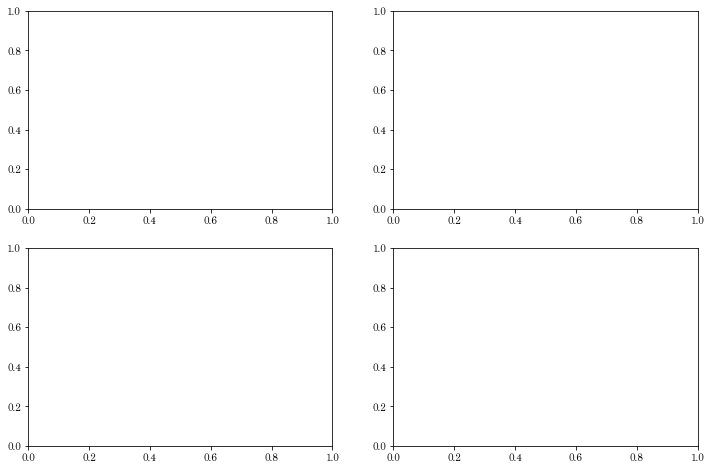

In [6]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8)) # argued into figsize is a (width, length) tuple.

### *Giving the Figure a Title*

...if necessary.

In [7]:
#fig.suptitle('Figure Title Here', fontsize=16)

# 2 - Building the Graphs

Here we begin to build the graphs. I use the left hand side to demonstrate how to a plot similar to the ones in the figure sent to me would be plotted, and leave the right hand side mostly with default settings as a reference.

### X- and Y-axis Labels

Here we label the x- and y-axes for each side. Note that "date" is attached only to the bottom plot.

`fig` shows the figure in Jupyter.

Documentation...

- [`set_ylabel()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html)
- [`set_xlabel()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html)

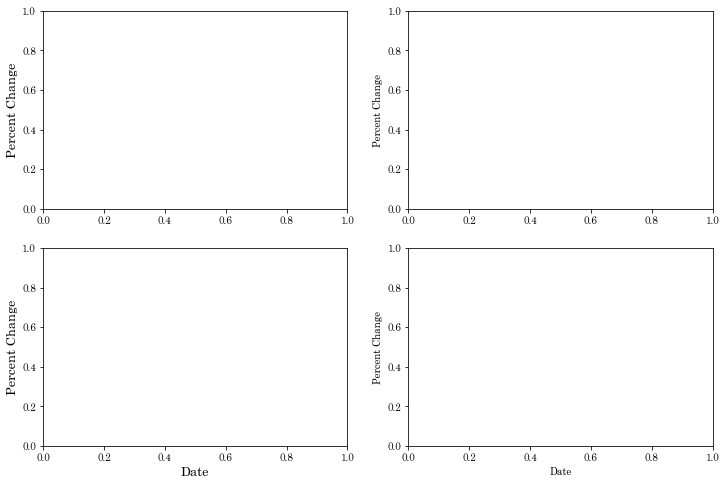

In [8]:
# y labels

axes[0][0].set_ylabel("Percent Change", fontsize = 13)
axes[1][0].set_ylabel("Percent Change", fontsize = 13)

axes[0][1].set_ylabel("Percent Change")
axes[1][1].set_ylabel("Percent Change")

# x labels

axes[1][0].set_xlabel("Date", fontsize = 13)

axes[1][1].set_xlabel("Date")

fig

### Plotting the Responses

Again, I just use somewhat arbitrary data here.

Note that `v2`,`v3`, etc. are the names of columns in the Pandas dataframe. .

Documentation...
- [Info on indexing and selecting data in Pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)
- [`ax.plot()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.plot.html) plots lines from data.
- [`ax.axhline()`]() draws a horizontal line across the entire plot.

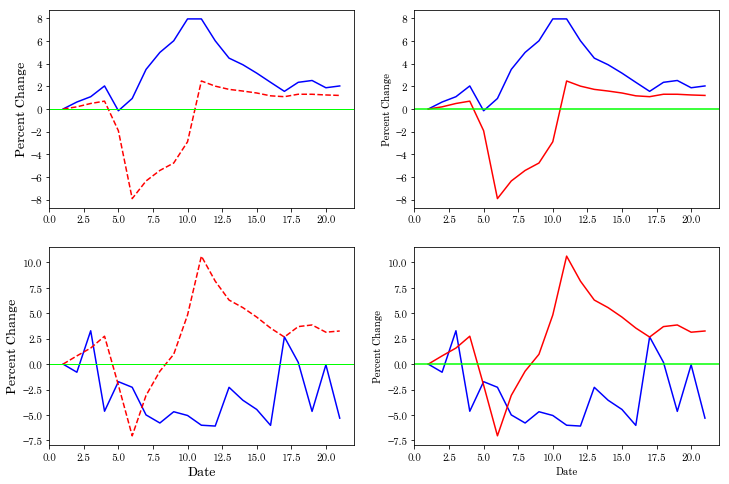

In [9]:
# Top left

axes[0][0].plot(t, df["v2"], color = blue)
axes[0][0].plot(t, df["v3"], color = red, linestyle = '--')
axes[0][0].axhline(y = 0, color = green, linewidth = 1) # Linewidth is in pixels, default is 2

# Bottom left

axes[1][0].plot(t, df["v4"], color = blue)
axes[1][0].plot(t, df["v6"], color = red, linestyle = '--')
axes[1][0].axhline(y = 0, color = green, linewidth = 1) # Linewidth is in pixels, default is 2

# Top right

axes[0][1].plot(t, df["v2"], color = blue)
axes[0][1].plot(t, df["v3"], color = red)
axes[0][1].axhline(y = 0, color = green)

# Bottom right

axes[1][1].plot(t, df["v4"], color = blue)
axes[1][1].plot(t, df["v6"], color = red)
axes[1][1].axhline(y = 0, color = green)

fig

### Building Grids for each Plot

Here we place a grid on each plot.

Note that dashed lines appear lighter than solid lines of the same colour.

Documentation...
- [`ax.grid()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.grid.html)

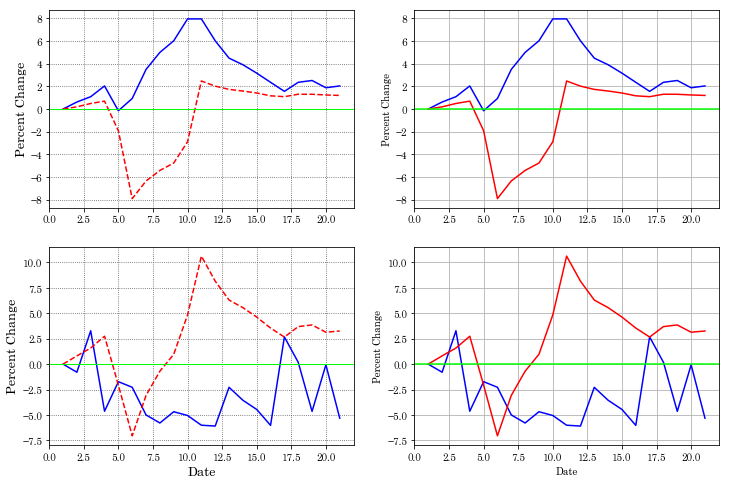

In [10]:
axes[0][0].grid(linestyle = ':', color = (0.3,0.3,0.3)) # default grid colour is (0.5,0.5,0.5)
axes[1][0].grid(linestyle = ':', color = (0.3,0.3,0.3))

axes[0][1].grid()
axes[1][1].grid()

fig

### Adding Legends

Note that legends pull variable names directly from the Pandas dataframe; to change the variable names in the legend, one must rename columns in the dataframe with [`df.rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).

`fancybox` determines whether a rounded box is used, `framealpha` determines the opaqueness of the box.

Documentation...
- [`ax.legend()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.legend.html)

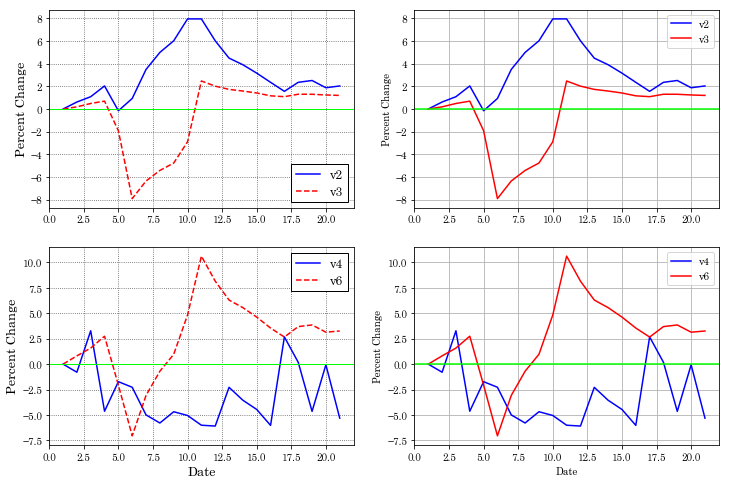

In [11]:
axes[0][0].legend(loc = 'lower right', fancybox = False, edgecolor = (0,0,0), framealpha = 1, fontsize = 12) 
axes[1][0].legend(loc = 'upper right', fancybox = False, edgecolor = (0,0,0), framealpha = 1, fontsize = 12) 

axes[0][1].legend(loc = 'best') # default legend
axes[1][1].legend(loc = 'best') 

fig

### *X-ticks (Force Integers, Automatic Spacing)*

This is a convenient solution to removing decimal tick labels for discrete data, but tends to make the labels start at 0.

In [12]:
#axes[0][0].xaxis.set_major_locator(MaxNLocator(integer=True))
#axes[1][0].xaxis.set_major_locator(MaxNLocator(integer=True))

#fig

### X-ticks (Specify Labels)

This uses the `range` function, which generates a sequence of numbers according to...

`range(start, stop, step)`

...inclusive of start and exclusive of stop.

Documentation...
- [`ax.set_xticks()`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xticks.html)

This can all be done analagously for the y axis.

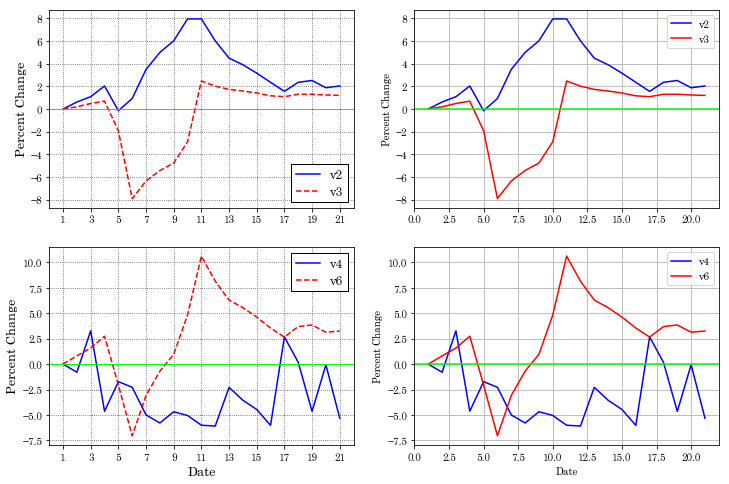

In [13]:
axes[0][0].set_xticks(range(1,23,2))
axes[1][0].set_xticks(range(1,23,2))

fig

### Get Tick Label Font Size

Here we write and apply a function to determine tick font size for a given axis.

Documentation...
- [`ax.axis.get_major_ticks()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axis.Axis.get_major_ticks.html) gets the tick objects.
- The [Matplotlib text object methods](https://matplotlib.org/3.1.1/api/text_api.html) documentation contains `tick.label.set_fontsize()` 

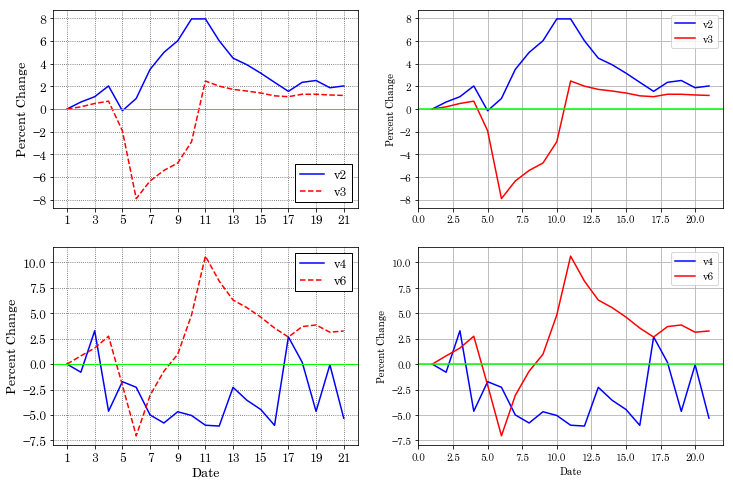

In [14]:
def tickfontsize(axis, fs):

    for tick in axis.xaxis.get_major_ticks():
    
        tick.label.set_fontsize(fs)

    for tick in axis.yaxis.get_major_ticks():
    
        tick.label.set_fontsize(fs)

tickfontsize(axes[0][0], 12)
tickfontsize(axes[1][0], 12)

fig

### Export Figure to Local Directory

Here we save the figure to the image type specified in the file name.

Documentation...
- [`fig.savefig()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html)

In [15]:
fig.savefig("Impulse_Responses.png")